In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, mean_squared_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action ="ignore")

##Descrizione del Problema

In [5]:
data = pd.read_csv("../content/fetal_health.csv")
data.head().T

0  ...        4
baseline value                                      120.0  ...  132.000
accelerations                                         0.0  ...    0.007
fetal_movement                                        0.0  ...    0.000
uterine_contractions                                  0.0  ...    0.008
light_decelerations                                   0.0  ...    0.000
severe_decelerations                                  0.0  ...    0.000
prolongued_decelerations                              0.0  ...    0.000
abnormal_short_term_variability                      73.0  ...   16.000
mean_value_of_short_term_variability                  0.5  ...    2.400
percentage_of_time_with_abnormal_long_term_vari...   43.0  ...    0.000
mean_value_of_long_term_variability                   2.4  ...   19.900
histogram_width                                      64.0  ...  117.000
histogram_min                                        62.0  ...   53.000
histogram_max                                       126.0  ...  170.000
histogram_number_of_peaks                             2.0  ...    9.000
histogram_number_of_zeroes                            0.0  ...    0.000
histogram_mode                                      120.0  ...  137.000
histogram_mean                                      137.0  ...  136.000
histogram_median                                    121.0  ...  138.000
histogram_variance                                   73.0  ...   11.000
histogram_tendency                                    1.0  ...    1.000
fetal_health                                          2.0  ...    1.000

[22 rows x 5 columns]

Il problema è un problema di classificazione e regressione, basato su un set di dati formato da un record di caratteristiche estratte da esami di cardiotocografia (CTG) eseguiti su feti umani

In [6]:
data.shape

(2126, 22)

Il numero di record è 2126, descritti da 22 feature.

La classificazione avviene tramite 3 classi:
*  1 - Normale
*  2 - Sospetto
*  3 - Patologico

Quindi si tratta di un problema di classificazione multiclasse.


Controlliamo quanti casi ci sono per ogni classe:

In [7]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [8]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


I valori rappresentati sono i seguenti:

*   **baseline value** : Frequenza cardiaca fetale basale (FHR)
*   **accelerations** : Numero di accelerazioni al secondo
*   **fetal_movement** : Numero di movimenti fetali al secondo
*   **uterine_contractions** : Numero di contrazioni uterine al secondo
*   **light_decelerations** : Numero di LD al secondo
*   **severe_decelerations** : Numero di SD al secondo
*   **prolongued_decelerations** : Numero di PD al secondo
*   **abnormal_short_term_variability** : Percentuale di tempo con variabilità anomala a breve termine
*   **mean_value_of_short_term_variability** : Valore medio della variabilità a breve termine
*   **percentage_of_time_with_abnormal_long_term_variability** : Percentuale di tempo con variabilità anomala a lungo termine
*   **mean_value_of_long_term_variability** : Valore medio della variabilità a lungo termine
*   **histogram_width** :Larghezza dell'istogramma realizzato utilizzando tutti i valori di un record
*   **histogram_min** : Valore minimo dell'istogramma
*   **histogram_max** : Valore massimo dell'istogramma
*   **histogram_number_of_peaks** : Numero di picchi nell'istogramma dell'esame
*   **histogram_number_of_zeroes** : Numero di zeri nell'istogramma dell'esame
*   **histogram_mode** : Moda dell'istogramma
*   **histogram_mean** : media dell'istogramma
*   **histogram_median** : mediana dell'istogramma
*   **histogram_variance** : Varianza dell'istogramma
*   **histogram_tendency** : Tendenza dell'istogramma
*   **fetal_health** : salute del feto: 1 - Normale 2 - Sospetto 3 - Patologico



Vediamo ora la distribuzione delle 3 classi nel dataset

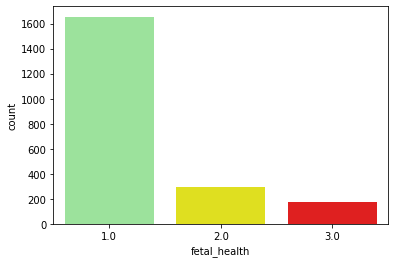

In [9]:
sns.countplot(data= data, x="fetal_health", palette=["lightgreen", "yellow", "red"])

In [10]:
df = data.copy()
df['fetal_health'] = data['fetal_health'].map({1:'Normal', 2:'Suspect', 3:'Pathological'})

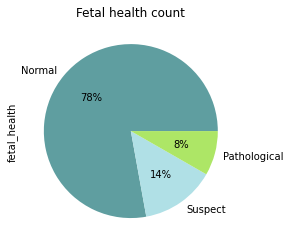

In [11]:
df['fetal_health'].value_counts().plot.pie( labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADE666"], autopct="%1.0f%%")
plt.title("Fetal health count")

plt.show()

#Analisi Esplorativa

Tramite l'analisi dei dati possiamo esplorare gli elementi presenti nel nostro dataset, come segue:

In [12]:
df.describe().T

count  ...      max
baseline value                                      2126.0  ...  160.000
accelerations                                       2126.0  ...    0.019
fetal_movement                                      2126.0  ...    0.481
uterine_contractions                                2126.0  ...    0.015
light_decelerations                                 2126.0  ...    0.015
severe_decelerations                                2126.0  ...    0.001
prolongued_decelerations                            2126.0  ...    0.005
abnormal_short_term_variability                     2126.0  ...   87.000
mean_value_of_short_term_variability                2126.0  ...    7.000
percentage_of_time_with_abnormal_long_term_vari...  2126.0  ...   91.000
mean_value_of_long_term_variability                 2126.0  ...   50.700
histogram_width                                     2126.0  ...  180.000
histogram_min                                       2126.0  ...  159.000
histogram_max                                       2126.0  ...  238.000
histogram_number_of_peaks                           2126.0  ...   18.000
histogram_number_of_zeroes                          2126.0  ...   10.000
histogram_mode                                      2126.0  ...  187.000
histogram_mean                                      2126.0  ...  182.000
histogram_median                                    2126.0  ...  186.000
histogram_variance                                  2126.0  ...  269.000
histogram_tendency                                  2126.0  ...    1.000

[21 rows x 8 columns]

Il metodo dataframe.describe() genera statistiche descrittive solamente per i valori numerici: questo metodo sintetizza la tendenza centrale, la dispersione e la forma della distribuzione di un dataset, escludendo i valori nulli.

Le statistiche generate dal metodo describe() sono le seguenti:

*   *Count* indica il numero di righe non vuote di una caratteristica, da come si evince non ci sono righe vuote
*   *Mean* indica il valore medio della caratteristica
*   *Std* rappresenta la deviazione standard di una data feature
*   *Min* è il valore minimo di un tratto
*   *25%, 50%, 75%* sono i percentili/quartili per ogni caratteristica. Queste information sui quartili ci aiutano ad individuare i valori anomali
*   *Max* evidenzia il valore massimo per ogni feature



In un problema di classificazione, è utile visualizzare quanto le variabili predittive siano correlate con la classe da predire.

Vogliamo ora integrare l'informazione della classe per valutare quanto le variabili siano utili nella predizione della classe stessa.

Visualizziamo un'istogramma stacked di accelerations, con la relativa distribuzione della classe fetal_health lungo l'ascissa dei valori.

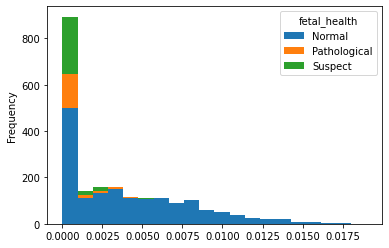

In [13]:
df.pivot(columns="fetal_health")["accelerations"].plot.hist(bins=20, stacked=True);

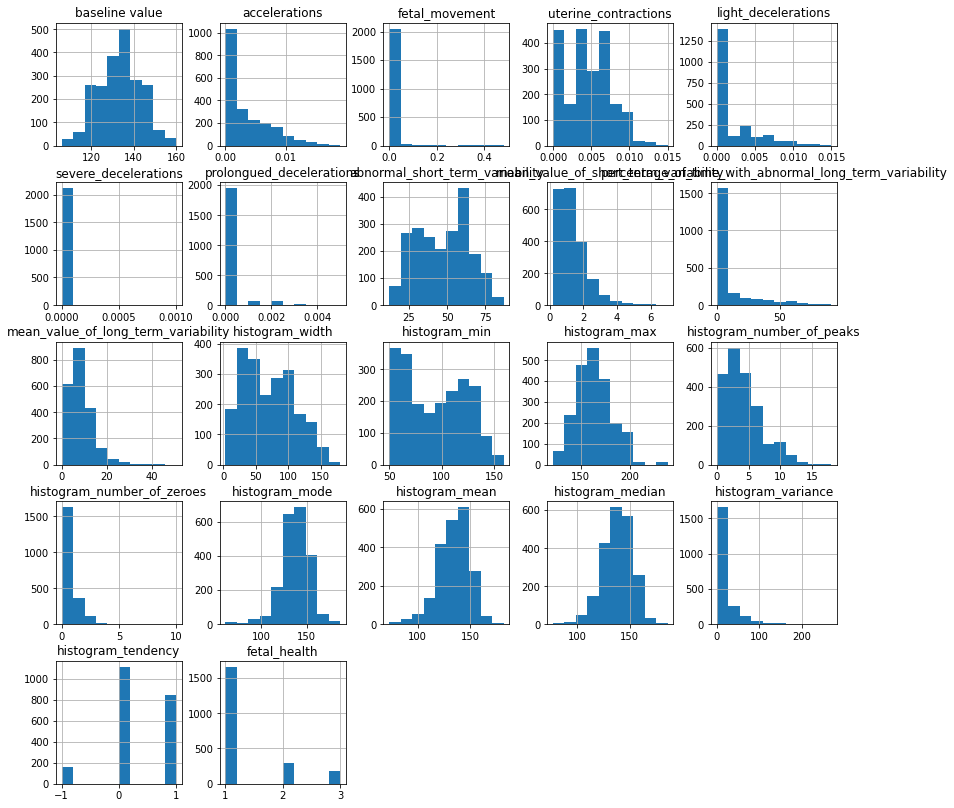

In [14]:
hist_plot = data.hist(figsize=(14,14))

Un cosa importante che possiamo riscontare negli istogrammi appena disegnati sopra è l'asimmetria nella distribuzione dei dati.
L'asimmetria è infatti una variabile che misura la distribuzione di una variabile casuale a valori reali rispetto alla sua media.

Negli istogrammi precedenti possiamo individuare tre tipologie di distribuzine asimmetrica:

*   *distribuzione asimmetrica a destra (o positiva)*:  c'è una lunga coda nella direzione negativa sulla linea dei numeri perchè i dati si concentrano suguendo l'asse positivo delle ascisse


*   *distribuzione asimmetrica a sinistra (o negativa)*: c'è una lunga coda nella direzione positiva sulla linea dei numeri perchè i dati si concentrano seguendo la direzione dell'origine degli assi


*   *distribuzione normale*: i dati sono distribuiti in maniera unifirme all'interno dell'istogramma e non si riscontra una particolare propensione verso una specifica direzione

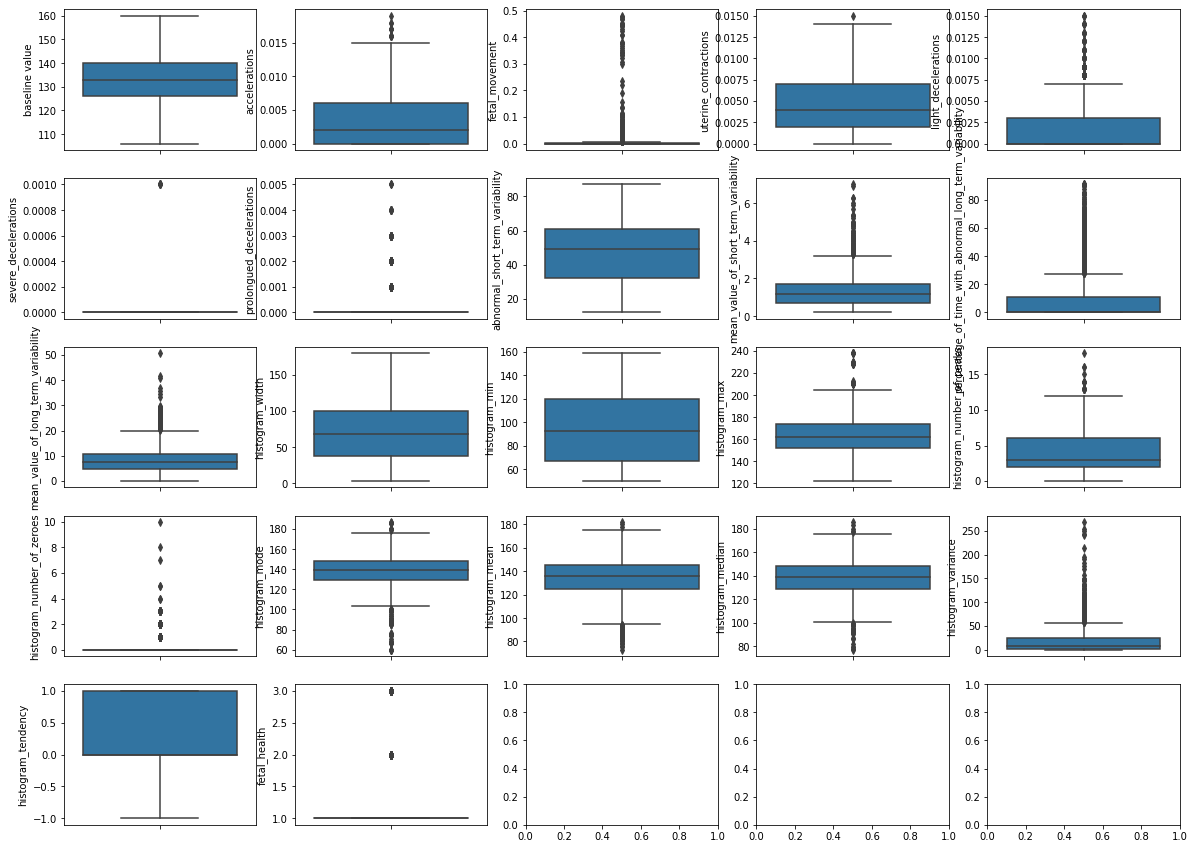

In [15]:
fig, ax = plt.subplots(ncols=5,nrows=5, figsize = (20,15))
index = 0
ax = ax.flatten()

for column, value in data.items():
  sns.boxplot(y=column, data=data, ax=ax[index])
  index+=1

Il boxplot è la tipologia di grafico che permette di visualizzare in maniera evidente eventuali anomalie nei dati.

##Correlazione dei Dati

Di seguito vogliamo mostrare la correlazione tra i valori numerici e la classe "fetal_health", in modo da avere un'idea della connessione tra i valori.
Le feature coi colori più scuri sono quelle maggiormente correlate con l'obiettivo

In [16]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

Possiamo notare che "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" hanno un'alta correlazione con la colonna target

###Matrice di correlazione

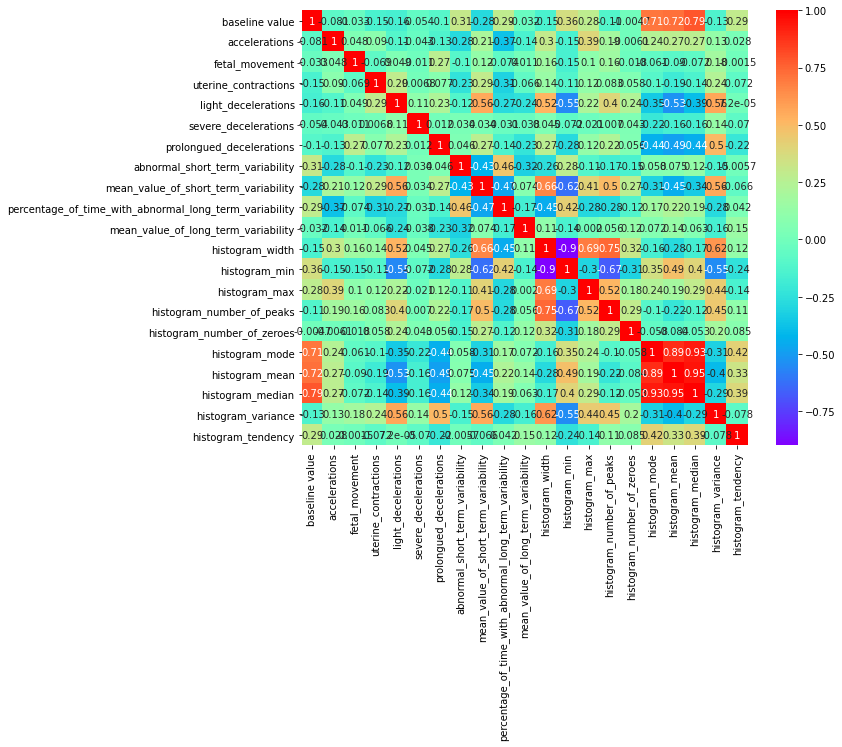

In [17]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.show()

#Pre-Processing dei Dati

Dalla matrice di correlazione, possiamo dedurre che i valori "hystogram_mode", "hystogram_mean" e "hystogram_median" sono altamente correlati tra loro. Inoltre, "hystogram_min" e "hystogram_width" sono negativamente correlate, perciò procediamo col rimuovere le colonne "hystogram_mode", "hystogram_mean" e "hystogram_median" dal datataset.



In [18]:
df = df.drop(['histogram_mean','histogram_median','histogram_mode'], axis=1)

In [19]:
df.shape

(2126, 19)

###Ricerca Valori Mancanti




In [20]:
## Conteggio dei valori mancanti e dei valori nulli
nv = df.columns[df.isnull().any()]
print('Null values = ', nv)

mv = df.columns[df.isna().any()]
print('Missing values = ', mv)

Null values =  Index([], dtype='object')
Missing values =  Index([], dtype='object')


###Rimozione Duplicati

Procediamo con la ricerca e rimozione delle linee duplicate nel dataset

In [21]:
df_dup=df.copy()
df_dup.drop_duplicates(inplace=True)
print("NEW SHAPE AFTER REMOVING DUPLICATES : ",df_dup.shape)
df_dup.head()

NEW SHAPE AFTER REMOVING DUPLICATES :  (2113, 19)


baseline value  accelerations  ...  histogram_tendency  fetal_health
0           120.0          0.000  ...                 1.0       Suspect
1           132.0          0.006  ...                 0.0        Normal
2           133.0          0.003  ...                 0.0        Normal
3           134.0          0.003  ...                 1.0        Normal
4           132.0          0.007  ...                 1.0        Normal

[5 rows x 19 columns]

##Scaling dei Dati

La feature dello Scaling è uno degli step più importanti per il pre-processing dei dati prima di creare un vero e proprio modello di machine learning: lo Scaling può fare la differenza tra un modello di machine learning poco efficace ed uno migliore.

Le tecniche più comuni di Scaling sono la Normalizzazione e la Standardizzazione: la prima viene usata quando vogliamo che i nostri valori siano compresi tra 2 numeri, tipicamente tra [0, 1] o [-1, -1], mentre la Standardizzazione trasforma i dati in modo da avere media uguale a 0 e una varianza pari a 1.

Il diagramma sotto mostra la differenza dopo lo Scaling negli assi X-Y

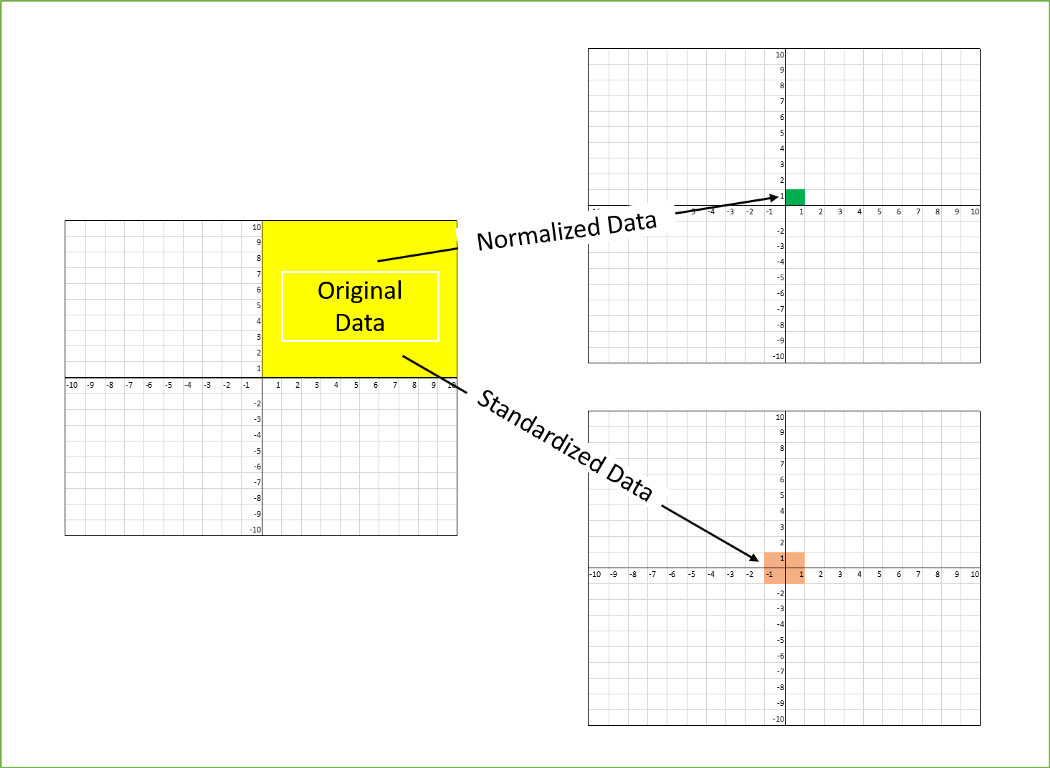

In [22]:

X = df_dup.drop(columns='fetal_health')
y = df_dup['fetal_health']
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X=pd.DataFrame(X_scale, index=X.index, columns=X.columns)
X.head()


baseline value  accelerations  ...  histogram_variance  histogram_tendency
0       -1.352782      -0.823776  ...            1.863218            1.115505
1       -0.132665       0.726444  ...           -0.237919           -0.521344
2       -0.030989      -0.048666  ...           -0.203474           -0.521344
3        0.070687      -0.048666  ...           -0.203474            1.115505
4       -0.132665       0.984814  ...           -0.272364            1.115505

[5 rows x 18 columns]

Creiamo le variabili di test e validazione per addestrare i modelli, utilizzando il 70% della dimensione totale del set di addestramento e convalidando le sue prestazioni nel restante 30%.

In [23]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1479, 18), (634, 18), (1479,), (634,))

#Classificazione

Dopo aver analizzato i dati a nostra disposizione e averli processati per poterli manipolar più agevolmente, ci possiamo occupare della ricerca del miglior modello di classificazione. 

I principali modelli che testeremo sono i seguenti:
*  Perceptron
*  Logistic Regression (LR)
*  K-nearest neighbors (KNN)
*  Random Forest (RF)

Per migliorare tutti i punteggi di ogni modello ML, vogliamo cercare l'insieme degli "iperparametri" utilizzando l'approccio comune "Grid Search" per i modelli. 

Gli iperparametri sono un insieme di parametri aggiuntivi e dipendenti dal modello, che non vengono dedotti automaticamente dall'algoritmo di apprendimento ma devono essere specificati prima della fase di apprendimento: un comune esempio  di iperparametro è il valore k in k-Nearest Neighbor o il numero di unità nascoste in una rete neurale.

Per questo motivo, trovare valori subottimali degli iperparametri è fondamentale per garantire una corretta generalizzazione. 
La procedura di ottimizzazione degli iperparametri, ripetuta separatamente per ciascuna metodologia di apprendimento utilizzata, comprende i seguenti passaggi:

1.   Per prima cosa, è stato identificato un insieme di iperparametri idonei da ottimizzare; per ciascuno di essi, è stato specificato un intervallo di valori candidati.

2.   Successivamente, viene generato un modello predittivo per tutte le possibili combinazioni di iperparametri e le sue prestazioni sul set di validazione sono state stimate utilizzando la Cross Validation (CV).

GridSearch ricerca in modo esaustivo tutte le possibili combinazioni di iperparametri durante la fase di training. 


##Perceptron

Partiamo con lo studio di classificazione utilizzando il modello più semplice, ovvero il Perceptron.


In [25]:
perc = Perceptron(random_state=42)


In [26]:
perceptron_mod = perc.fit(X_train, y_train)

Una volta addestrato il modello, possiamo trovare i valori dei pesi *w* e del bias *b* rispettivamente negli attributi coef_ e intercept_.

Siccome siamo in presenza di un modello multiclasse gli iperpiani sono più di uno.

In [27]:
perc.coef_

array([[  1.0777315 ,  16.03043376,   1.56300611,   4.37773363,
         -5.37049399,  -1.21070722,  -9.04373134, -10.88120895,
          6.18051314,  -4.40177903,  -0.23072348,   0.89130623,
         -2.32975692,  -1.90051581,  -1.90445156,   1.64262674,
         -3.54961549,   2.14657266],
       [ -3.87424191, -15.58534772,   5.45108735,  -4.42119707,
          4.00269007, -13.82841781,  11.64571438,  21.52233895,
          2.56890658,   9.23456646,   6.22052511,   2.82539233,
         -3.62015922,   0.17787247, -12.61187966,   1.6780743 ,
         12.02983663,  -5.32421289],
       [ -0.59547829, -16.62591974,  -2.46794537,  -1.15178099,
         -6.7346266 , -15.673305  ,  -0.36405359,   5.6374185 ,
         -8.08606342,  -1.2080936 ,  -0.42633631,   0.05276457,
          3.71974242,   6.24247179,   4.85069827,  -1.74094357,
         -1.2669781 ,  -0.72817694]])

In [28]:
perc.intercept_

array([ 21., -62., -30.])

In [29]:
perc.classes_

array(['Normal', 'Pathological', 'Suspect'], dtype='<U12')

Creiamo una funzione per visualizzare la retta del modello sovrapposta al grafico a dispersione dei dati

In [32]:
def plot_separator_on_data(X, y, perc=None):
    X = np.array(X)
    diagnosis_color_map = {"normal": "green", "suspect": "yellow", "pathological": "red"}
    colors = pd.Series(y).map(diagnosis_color_map)
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    if perc is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        sep_x = np.linspace(*xlim, 2)
        sep_y = separator_2d(perc, sep_x)
        plt.plot(sep_x, sep_y, c="blue", linewidth=2)
        plt.xlim(xlim); plt.ylim(ylim)

def separator_2d(perc, x1):
    return -x1*perc.coef_[0, 0]/perc.coef_[0, 1] - perc.intercept_[0] / perc.coef_[0, 1]

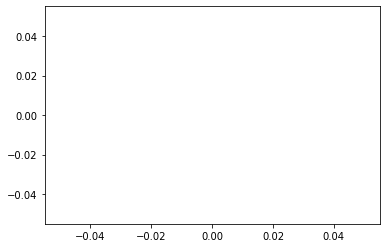

In [33]:
plot_separator_on_data(X_test, y_test, perc)

In [34]:
perc.predict(X_test[:3])

array(['Suspect', 'Normal', 'Normal'], dtype='<U12')

###Analisi Performance Modello

Oltre alla percentuale di classificazioni corrette, esistono altri modi per valutare l'accuratezza di un classificatore
Questi metodi risultano essere particolarmente utili in caso di sbilanciamento tra le classi, per cui l'accuratezza può non essere un indicatore affidabile

Confrontando le classi predette da un classificatore su un certo set di dati con quelle reali, possiamo ottenere una **_matrice di confusione_**, dove ogni cella in riga i e colonna j indica quanti esempi della classe i-esima sono stati etichettati dal classificatore come di classe j-esima


In [35]:
print("Classification Report")
print(classification_report(y_test, perc.predict(X_test)))

Classification Report
              precision    recall  f1-score   support

      Normal       0.94      0.95      0.94       494
Pathological       0.83      0.73      0.78        52
     Suspect       0.66      0.67      0.66        88

    accuracy                           0.89       634
   macro avg       0.81      0.78      0.79       634
weighted avg       0.89      0.89      0.89       634




* *Precisione* - rapporto tra le predizioni positive esatte e quelle totali

Precisione = TP/TP+FP
* *Sensitività (Recall)* - rapporto tra le predizioni positive corrette e tutte le predizione della classe attuale

Sensitività = TP/TP+FN
* *F1-Score* - media pesata di Precisione e Sensitività, quindi questo risultato prende in considerazione sia i falsi positivi che i falsi negativi.
Intuitivamente non è così semplice da comprendere come l'accuratezza, ma spesso risulta esserne più utile, specialmente se si è al cospetto di una distribuzione della classe non uniforme.
Se i costi dei falsi positivi e negativi sono molto diversi tra loro, è meglio prendere in considerazione la Precisione e Sensitività

F1 = 2(Sensitività * Precisione) / (Sensitività + Precisione)

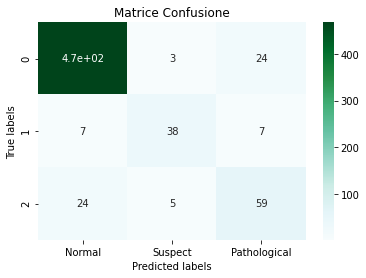

In [36]:
conf_perc = confusion_matrix(y_test, perc.predict(X_test))
ax= plt.subplot()
sns.heatmap(conf_perc, annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Matrice Confusione"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

##Regressione Logistica

Proviamo ora a migliorare i risultati utilizzando il modello di regressione logistica. 

In [37]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.896


Ora andremo ad effettuare del tuning sul modello per boostarlo

In [38]:
cv_method = StratifiedKFold(n_splits=3)

In [39]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.87829615 0.90263692 0.88235294]
CrossValMeans: 0.888
CrossValStandard Deviation: 0.011


In [40]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [41]:
GridSearchCV_LR = GridSearchCV(estimator=LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [42]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 164 tasks      | elapsed:    6.2s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:    7.2s finished


In [43]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [44]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 1, 'intercept_scaling': 1, 'tol': 0.0001}


In [45]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.888


In [46]:
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

###Analisi Performance Modello

In [47]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

      Normal       0.95      0.96      0.95       494
Pathological       0.80      0.77      0.78        52
     Suspect       0.66      0.64      0.65        88

    accuracy                           0.90       634
   macro avg       0.80      0.79      0.79       634
weighted avg       0.89      0.90      0.89       634



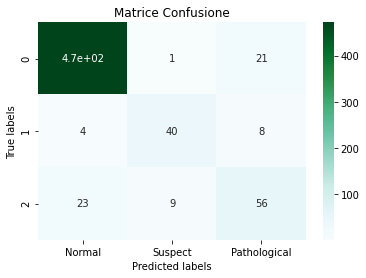

In [48]:
conf_logreg = confusion_matrix(y_test, pred_logistic_regression)
ax= plt.subplot()
sns.heatmap(conf_logreg, annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Matrice Confusione"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

##Random-Forest (RF)


Random Forest è un tipo di metodi di insieme in cui vengono combinati tra loro diversi modelli di apprendimento per migliorare la generalizzazione.

In [49]:
# Baseline model of RF with default parameters:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.946


In [50]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.92089249 0.94117647 0.93509128]
CrossValMeans: 0.932
CrossValStandard Deviation: 0.008


In [51]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]             
              }

In [52]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [53]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   23.2s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   52.5s finished


In [54]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [55]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.934


In [57]:
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

###Analisi Performance Modello

In [58]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

      Normal       0.96      0.98      0.97       494
Pathological       0.96      0.92      0.94        52
     Suspect       0.87      0.78      0.83        88

    accuracy                           0.95       634
   macro avg       0.93      0.90      0.91       634
weighted avg       0.95      0.95      0.95       634



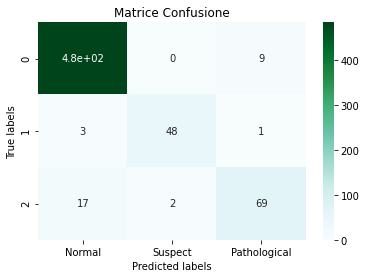

In [59]:
conf_rf = confusion_matrix(y_test, pred_random_forest)
ax= plt.subplot()
sns.heatmap(conf_rf, annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Matrice Confusione"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

##K-Nearest Neighbors (KNN)

k-Nearest Neighbor è un modello basato sulla memoria, dove le predizioni sono eseguite in base alla similarità del campione corrente ai *k* elementi più vicini nel training set, secondo la distanza data.

Il vantaggio di questo metodo sta nella sua semplicità, compensata sia dalla difficoltà nel determinare la funzione di similarità più appropriata sia dalla scelta dei k meta-parametri.


In [60]:
# Baseline model of K-Nearest Neighbors with default parameters:

knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbors: 0.901


In [61]:
# Cross validate K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3, 
                            random_state=42
                            )

scores_knn = cross_val_score(knn, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.87626775 0.89046653 0.88032454]
CrossValMeans: 0.882
CrossValStandard Deviation: 0.006


In [62]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [63]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [64]:
# Fit model with train data
GridSearchCV_knn.fit(X_train, y_train);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 3480 out of 3480 | elapsed:  7.2min finished


In [65]:
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(f"Best estimator for KNN model:\n{best_estimator_knn}")

Best estimator for KNN model:
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')


In [66]:
best_params_knn = GridSearchCV_knn.best_params_
print(f"Best parameter values:\n{best_params_knn}")

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}


In [67]:
best_score_knn = GridSearchCV_knn.best_score_
print(f"Best score for GNB model: {round(best_score_knn, 3)}")

Best score for GNB model: 0.896


In [68]:
# Test with new parameter for KNN model
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

###Analisi Performance del Modello

In [69]:
print("Classification Report")
print(classification_report(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95       494
Pathological       0.88      0.88      0.88        52
     Suspect       0.70      0.64      0.67        88

    accuracy                           0.91       634
   macro avg       0.84      0.83      0.83       634
weighted avg       0.91      0.91      0.91       634



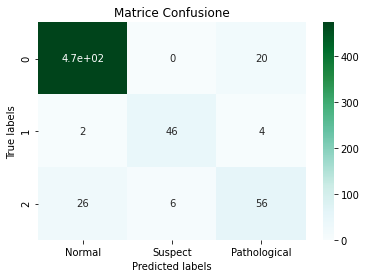

In [70]:
conf_knn = confusion_matrix(y_test, pred_knn)
ax= plt.subplot()
sns.heatmap(conf_knn, annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Matrice Confusione"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

##Selezione del Modello

In [71]:
results = pd.DataFrame({
                        "Model": ["Perceptron",
                                  "Logistic Regression",
                                  "Random Forest",
                                  "K-Nearest Neighbors"],
                        "Score": [perceptron_mod.score(X_train, y_train),
                                  logistic_regression_mod.score(X_train, y_train),
                                  random_forest_mod.score(X_train, y_train),
                                  knn_mod.score(X_train, y_train),
                                    ]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

Model
Score                        
0.998648        Random Forest
0.944557  K-Nearest Neighbors
0.893847  Logistic Regression
0.889790           Perceptron

Calcoliamo gli intervalli di confidenze sui modelli al 95%

In [72]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()
#con confidenza del 0.95 si ha Z=1.96
pd.DataFrame([confidence(calculate_accuracy(conf_perc), len(X_test), 1.96),
              confidence(calculate_accuracy(conf_logreg), len(X_test), 1.96),
              confidence(calculate_accuracy(conf_rf), len(X_test), 1.96),
              confidence(calculate_accuracy(conf_knn), len(X_test), 1.96)],
                 index=["Perceptron", "logreg", "Random Forest", "KNN"], columns=["inf", "sup"])

inf       sup
Perceptron     0.862809  0.911678
logreg         0.869695  0.917335
Random Forest  0.929615  0.964023
KNN            0.883548  0.928565

Dagli score e dagli intervalli di confidenza al 95% si evince che il metodo più affidabile è Random Forest, anche se K-Nearest Neighbors ha prestazioni simili

#Predizione

##Pre-Processing

Procediamo ora al pre-processing dei dati per impostare i modelli di predizione, i passi sono gli stessi, rimozione delle categorie correlate tra loro ("histogram_mean", "histogram_mode", "histogram_median") e dei duplicati.

L'analisi dei dati non verrà ripetuta in quanto è già stata effettuata in precedenza

In [73]:
data = data.drop(['histogram_mean', 'histogram_mode', 'histogram_median'], axis=1)

In [74]:
data_dup=data.copy()
data_dup.drop_duplicates(inplace=True)
print("NEW SHAPE AFTER REMOVING DUPLICATES : ",df_dup.shape)
data_dup.head().T

NEW SHAPE AFTER REMOVING DUPLICATES :  (2113, 19)


0  ...        4
baseline value                                      120.0  ...  132.000
accelerations                                         0.0  ...    0.007
fetal_movement                                        0.0  ...    0.000
uterine_contractions                                  0.0  ...    0.008
light_decelerations                                   0.0  ...    0.000
severe_decelerations                                  0.0  ...    0.000
prolongued_decelerations                              0.0  ...    0.000
abnormal_short_term_variability                      73.0  ...   16.000
mean_value_of_short_term_variability                  0.5  ...    2.400
percentage_of_time_with_abnormal_long_term_vari...   43.0  ...    0.000
mean_value_of_long_term_variability                   2.4  ...   19.900
histogram_width                                      64.0  ...  117.000
histogram_min                                        62.0  ...   53.000
histogram_max                                       126.0  ...  170.000
histogram_number_of_peaks                             2.0  ...    9.000
histogram_number_of_zeroes                            0.0  ...    0.000
histogram_variance                                   73.0  ...   11.000
histogram_tendency                                    1.0  ...    1.000
fetal_health                                          2.0  ...    1.000

[19 rows x 5 columns]

Ora creiamo i modelli con l'ausilio delle Pipeline di sklearn e procediamo con l'applicazione di diversi modelli di regressione utilizzando la grid search per individuare un set di iperparametri che ne massimizzi l'accuratezza.

In [75]:
X = data_dup.drop(columns='fetal_health')
y = data_dup['fetal_health']


In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [77]:
sel = ["rank_test_score","mean_test_score","params"]

##Regressione Lasso

Partiamo addestrando un modello poco complesso: creiamo una pipeline e facciamo partire la grid search che testa il modello in 5-cross fold validation secondo il set di iperparametri che gli chiediamo di valutare.


In [78]:
from sklearn.linear_model import Lasso
model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Lasso())
])
grid = {
    "linreg__alpha": [0.1, 0.5, 1]
    }
gs = GridSearchCV(model, param_grid=grid, cv=5)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

rank_test_score  mean_test_score                  params
0                1         0.460623  {'linreg__alpha': 0.1}
1                2        -0.003283  {'linreg__alpha': 0.5}
2                2        -0.003283    {'linreg__alpha': 1}

In [79]:
gs.best_params_

{'linreg__alpha': 0.1}

##Regressione Ridge

Testiamo ora il modello di regressione Ridge per valutare le performance di un modello di regressione lineare applicando una regolarizzazione per evitare che i coefficienti crescano troppo.

In [80]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Ridge())
])
grid = {
    "linreg__alpha": [0.1, 1, 10, 50]
    }
gs = GridSearchCV(model, param_grid=grid, cv=5)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

rank_test_score  mean_test_score                  params
2                1         0.561120   {'linreg__alpha': 10}
3                2         0.561065   {'linreg__alpha': 50}
1                3         0.560872    {'linreg__alpha': 1}
0                4         0.560840  {'linreg__alpha': 0.1}

Vediamo come il peso della regolarizzazione, rappresentato da alpha, non modifichi particolarmente i risultati ottenuti: questo porta a pensare che con la semplice regressione lineare si possa giungere ad un risultato soddisfacente.



In [81]:
gs.best_params_

{'linreg__alpha': 10}

##Regressione Lineare

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

linear_model = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", LinearRegression())
])

kf = KFold(5, shuffle=True, random_state=42)
scores = cross_val_score(model,X_train , y_train, cv=kf)
scores.mean()

0.5573648374641506

Possiamo notare che l'accuratezza raggiunta è pressochè identica a quella della regressione Ridge: ciò significa che, come previsto, la regolarizzazione non influisce in modo significativo sul risultato.

##Elastic Net

La regressione Elastic Net combina le regolarizzazioni L2 e L1 usate nella regressione Ridge e Lasso


In [83]:
from sklearn.linear_model import ElasticNet
model = Pipeline([
                  ("scale", StandardScaler(with_mean=False)),
                  ("regr", ElasticNet())
])
grid={
    "regr__alpha": [0.1, 1, 5],
    "regr__l1_ratio": [0.1, 0.2, 0.3]
}
gs=GridSearchCV(model, param_grid=grid, cv=5)

gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]


rank_test_score  ...                                       params
0                1  ...  {'regr__alpha': 0.1, 'regr__l1_ratio': 0.1}
1                2  ...  {'regr__alpha': 0.1, 'regr__l1_ratio': 0.2}
2                3  ...  {'regr__alpha': 0.1, 'regr__l1_ratio': 0.3}
3                4  ...    {'regr__alpha': 1, 'regr__l1_ratio': 0.1}
4                5  ...    {'regr__alpha': 1, 'regr__l1_ratio': 0.2}
5                6  ...    {'regr__alpha': 1, 'regr__l1_ratio': 0.3}
6                7  ...    {'regr__alpha': 5, 'regr__l1_ratio': 0.1}
7                7  ...    {'regr__alpha': 5, 'regr__l1_ratio': 0.2}
8                7  ...    {'regr__alpha': 5, 'regr__l1_ratio': 0.3}

[9 rows x 3 columns]

Lo score dell'Elastic Net è identico a quello della Regressione Lineare.

Testiamo ora un modello Elastic Net con feature polinomiali di 2° e 3° Grado

In [84]:
model = Pipeline([
                  ("poly", PolynomialFeatures(include_bias=False)),
                  ("scale", StandardScaler(with_mean=False)),
                  ("regr", ElasticNet())
])
grid={
    "poly__degree": [2,3],
    "regr__alpha": [0.1, 1, 2],
    "regr__l1_ratio": [0.1, 0.2, 0.3]
}
gs=GridSearchCV(model, param_grid=grid, cv=5)

gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

rank_test_score  ...                                             params
9                 1  ...  {'poly__degree': 3, 'regr__alpha': 0.1, 'regr_...
10                2  ...  {'poly__degree': 3, 'regr__alpha': 0.1, 'regr_...
0                 3  ...  {'poly__degree': 2, 'regr__alpha': 0.1, 'regr_...
11                4  ...  {'poly__degree': 3, 'regr__alpha': 0.1, 'regr_...
1                 5  ...  {'poly__degree': 2, 'regr__alpha': 0.1, 'regr_...
2                 6  ...  {'poly__degree': 2, 'regr__alpha': 0.1, 'regr_...
12                7  ...  {'poly__degree': 3, 'regr__alpha': 1, 'regr__l...
3                 8  ...  {'poly__degree': 2, 'regr__alpha': 1, 'regr__l...
13                9  ...  {'poly__degree': 3, 'regr__alpha': 1, 'regr__l...
15               10  ...  {'poly__degree': 3, 'regr__alpha': 2, 'regr__l...
4                11  ...  {'poly__degree': 2, 'regr__alpha': 1, 'regr__l...
6                12  ...  {'poly__degree': 2, 'regr__alpha': 2, 'regr__l...
14               13  ...  {'poly__degree': 3, 'regr__alpha': 1, 'regr__l...
5                14  ...  {'poly__degree': 2, 'regr__alpha': 1, 'regr__l...
7                15  ...  {'poly__degree': 2, 'regr__alpha': 2, 'regr__l...
8                15  ...  {'poly__degree': 2, 'regr__alpha': 2, 'regr__l...
16               15  ...  {'poly__degree': 3, 'regr__alpha': 2, 'regr__l...
17               15  ...  {'poly__degree': 3, 'regr__alpha': 2, 'regr__l...

[18 rows x 3 columns]

Notiamo che con le feature polinomiali l'accuratezza aumenta, a discapito della velocità di calcolo

In [85]:
gs.best_params_

{'poly__degree': 3, 'regr__alpha': 0.1, 'regr__l1_ratio': 0.1}

##Valutazione dei Modelli Migliori

Andiamo ora a valutare con più attenzione i modelli che abbiamo individuato, addestrati con i parametri migliori individuati dalla GridSearch

In [86]:
# importo MSE e R²
from sklearn.metrics import mean_squared_error, r2_score

# definisco funzione per errore relativo
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# funzione per calcolare e stampare tutte e tre
def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

In [87]:
lasso= Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Lasso(alpha=0.1))
])

linear = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", LinearRegression())
])

elastic=Pipeline([
                  ("poly", PolynomialFeatures(include_bias=False, degree=3)),
                  ("scale",  StandardScaler(with_mean=False)),
                  ("regr", ElasticNet(alpha=0.1, l1_ratio=0.1))
])

ridge = Pipeline([
    ("scale",  StandardScaler(with_mean=False)),
    ("linreg", Ridge(alpha=50))
])

lasso.fit(X_train, y_train)
linear.fit(X_train, y_train)
elastic.fit(X_train, y_train)
ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('linreg',
                 Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='auto',
                       tol=0.001))],
         verbose=False)

In [88]:
print("Linear model Train")
print_eval(X_train, y_train, linear)
print("--------------------------------")
print("Linear model Val")
print_eval(X_val, y_val, linear)
print("================================")
print("Lasso model Train")
print_eval(X_train, y_train, lasso)
print("--------------------------------")
print("Lasso model Val")
print_eval(X_val, y_val, lasso)
print("================================")
print("ElasticNet model Train")
print_eval(X_train, y_train, elastic)
print("--------------------------------")
print("ElasticNet model Val")
print_eval(X_val, y_val, elastic)
print("================================")
print("Ridge model Train")
print_eval(X_train, y_train, ridge)
print("--------------------------------")
print("Ridge model Val")
print_eval(X_val, y_val, ridge)

Linear model Train
   Mean squared error: 0.16253
       Relative error: 21.99461%
R-squared coefficient: 0.58126
--------------------------------
Linear model Val
   Mean squared error: 0.1429
       Relative error: 20.97183%
R-squared coefficient: 0.59722
Lasso model Train
   Mean squared error: 0.20666
       Relative error: 22.61724%
R-squared coefficient: 0.46756
--------------------------------
Lasso model Val
   Mean squared error: 0.17859
       Relative error: 21.75975%
R-squared coefficient: 0.49662
ElasticNet model Train
   Mean squared error: 0.10468
       Relative error: 14.84717%
R-squared coefficient: 0.73031
--------------------------------
ElasticNet model Val
   Mean squared error: 0.1012
       Relative error: 14.96894%
R-squared coefficient: 0.71477
Ridge model Train
   Mean squared error: 0.1629
       Relative error: 21.93171%
R-squared coefficient: 0.58031
--------------------------------
Ridge model Val
   Mean squared error: 0.1421
       Relative error: 20.82

Il modello che presenta errore relativo più basso risulta essere l'ElasticNet.
Gli errori sono abbastanza elevati in quanto il dataset si presta meglio alla classificazione, però i risultati sono abbastanza soddisfacenti considerati i dati a disposizione

#Conclusioni

Dall'analisi di questo dataset tramite tecniche semplici di analisi, classificazione e regressione, siamo riuscite ad ottenere modelli di apprendimento dotati di buona precisione e coerenti con la realtà.

L'idea dietro al progetto è quella di poter creare modelli ML che in futuro possano prevedere efficacemente questi problemi e, di conseguenza, ridurre la mortalità infantile e materna.

Alla luce di quanto sopra menzionato, i Cardiotocogrammi (CTG) sono un'opzione semplice ed economica per valutare la salute del feto, consentendo agli operatori sanitari di agire per prevenire la mortalità infantile e materna.